In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat1 = np.random.randn(800, 2) + np.array([0, -3])
cat2 = np.random.randn(800, 2) + np.array([3, 3])
cat3 = np.random.randn(800, 2) + np.array([-3, 3])


X = np.vstack([cat1, cat2, cat3])

labels = np.array([0]*800 + [1]*800 + [2]*800)

y = np.zeros((2400, 3))

for i in range(2400):
   y[i, labels[i]] = 1

In [0]:
print(X.shape)
print(y.shape)

(2400, 2)
(2400, 3)


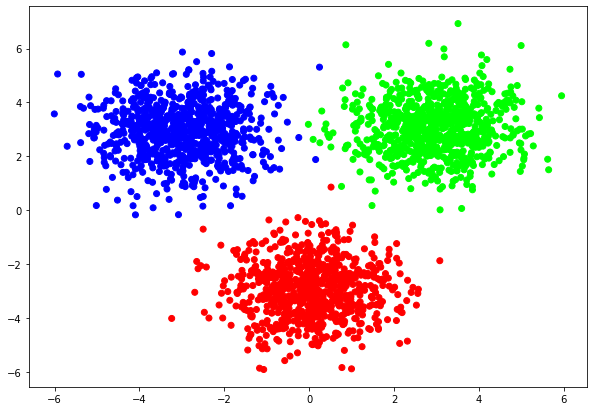

In [0]:
x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)

In [0]:
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        
        w = np.random.randn(weights[i], weights[i+1])
        b = np.random.randn()

        weight_list.append(w)
        bias_list.append(b)
    
    return weight_list, bias_list

In [0]:
def softmax(X):
    expX = np.exp(X)
    return expX / expX.sum(axis=1, keepdims=True)

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [0]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [0]:
def predictions(w, b, X):
    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)
    return ao


In [0]:
def find_cost(ao,y):
 
    total_cost = np.sum(-y * np.log(ao))
    return total_cost


In [0]:
def find_derivatives(w, b, X):

    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)

    # Back propagation phase 1


    dcost_dzo = (ao-y)
    dzo_dwo = ah.T
   
    dwo =  np.dot(dzo_dwo,  dcost_dzo)
    dbo = np.sum(dcost_dzo)
    
    # Back propagation phase 2
    
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah

  
    dzo_dah = w[1].T

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)

    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)

    return dwh, dbh, dwo, dbo

In [0]:
def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
    w[0] = w[0] - lr * dwh
    w[1] = w[1] - lr * dwo

    b[0] = b[0] - lr * dbh
    b[1] = b[1] - lr * dbo

    return w, b

In [0]:
def my_multiout_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w,b = define_parameters([input_len, 4, output_len])

    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )
        if i % 50 == 0 :
            print(cost)
            
    return w, b, error_list


In [0]:

lr = 0.0005
epochs = 1000
w, b, error_list = my_multiout_neural_network(X,y,lr,epochs)


4921.784443712775
115.05275654791413
60.7093977747567
43.422649664931626
34.88864651152795
29.785198170132094
26.38081266811703
23.942717399078127
22.107134982438154
20.67281284937415
19.519299319106253
18.570055076513714
17.774096074967886
17.09614091195548
16.51099321192574
16.000176100360964
15.549830828069574
15.149357906344129
14.790511529599819
14.466780088357714


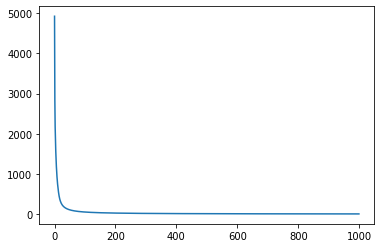

In [0]:
plt.plot(error_list)

In [0]:
w, b = define_parameters([2, 4, 3])

In [60]:
X[900]

array([4.90119069, 2.93933919])

In [63]:
pred = predictions(w, b, X[900].reshape(1,2))
print(np.argmax(pred))
print(np.argmax(y[900]))

1
1


## Exercise 3.1

### Question 1

In a neural network with three input features, one hidden layer of 5 nodes and an output layer three possible values, what will be the dimensions of weight that connects input to hidden layer. Remember the dimensions of the input data is (m,3) where m is the number of records. 

1. [5,3]
2. [3,5]
3. [4,5]
4. [5,4]

Answer: 2 

### Question 2

Which activation function do you use in the output layer in case of multiclass classification problems:

1. Sigmoid
2. Negative log likelihood
3. Relu
4. Softmax

Answer: 4

### Question 3

Neural networks with hidden layers are capable of finding:

1. Linear Boundaries
2. Non-linear Boundaries
3. All of the above
4. None of the Above

Answer: 3



## Excercise 3.2

Try to classify the following dataset with three classes by implementing multi-class classification neural network from scratch in Python

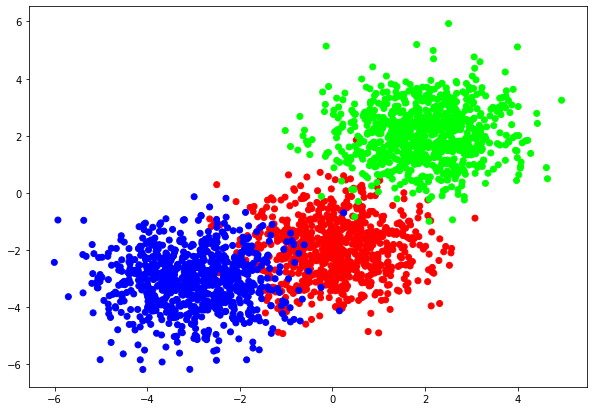

In [106]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat1 = np.random.randn(800, 2) + np.array([0, -2])
cat2 = np.random.randn(800, 2) + np.array([2, 2])
cat3 = np.random.randn(800, 2) + np.array([-3, -3])


X = np.vstack([cat1, cat2, cat3])

labels = np.array([0]*800 + [1]*800 + [2]*800)

y = np.zeros((2400, 3))

for i in range(2400):
   y[i, labels[i]] = 1


x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)

In [109]:
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        
        w = np.random.randn(weights[i], weights[i+1])
        b = np.random.randn()

        weight_list.append(w)
        bias_list.append(b)
    
    return weight_list, bias_list

def softmax(X):
    expX = np.exp(X)
    return expX / expX.sum(axis=1, keepdims=True)

def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))


def predictions(w, b, X):
    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)
    return ao


def find_cost(ao,y):
 
    total_cost = np.sum(-y * np.log(ao))
    return total_cost

def find_derivatives(w, b, X):

    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)

    # Back propagation phase 1


    dcost_dzo = (ao-y)
    dzo_dwo = ah.T
   
    dwo =  np.dot(dzo_dwo,  dcost_dzo)
    dbo = np.sum(dcost_dzo)
    
    # Back propagation phase 2
    
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah

  
    dzo_dah = w[1].T

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)

    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)

    return dwh, dbh, dwo, dbo

def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
    w[0] = w[0] - lr * dwh
    w[1] = w[1] - lr * dwo

    b[0] = b[0] - lr * dbh
    b[1] = b[1] - lr * dbo

    return w, b

def my_multiout_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w,b = define_parameters([input_len, 10, output_len])

    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )
        if i % 50 == 0 :
            print(cost)
            
    return w, b, error_list


lr = 0.005
epochs = 1000
w, b, error_list = my_multiout_neural_network(X,y,lr,epochs)


3781.664534721715
503.30979000656913
500.1993847257568
483.69250051116217
538.0708387448865
471.89741835313873
494.32556682459904
451.06996598957744
495.4026764866194
466.4678788181708
464.08031958037736
453.84660955171705
444.71879691870356
437.98916467776746
432.8761160458675
428.7587487050419
425.26890732386016
422.2041558899916
419.45417214876534
416.9587244155497
